# Classification manuscrite des chiffres à l’aide d’un réseau neuronal

 nous allons classer les chiffres manuscrits à l’aide d’un simple réseau neuronal qui n’a que des couches d’entrée et de sortie. Nous allons ensuite ajouter une couche cachée et voir comment les performances du modèle s’améliorent

In [50]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

11490434/11490434 [==============================] - 7s 1us/step


60000

In [15]:
len(X_test)

10000

In [16]:
X_train[0].shape

(28, 28)

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

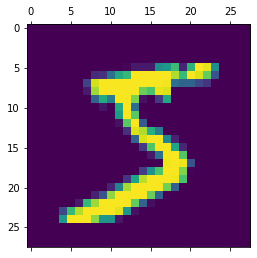

In [20]:
plt.matshow(X_train[0])

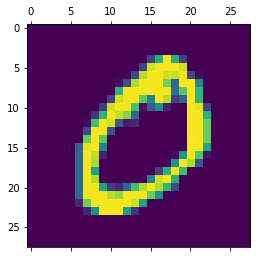

In [21]:
plt.matshow(X_train[1])

In [22]:
y_train[0]

5

In [23]:
X_train = X_train / 255
X_test = X_test / 255

In [24]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
X_train_flatt = X_train.reshape(len(X_train), 28*28)
X_test_flatt = X_test.reshape(len(X_test), 28*28)

In [26]:
X_train_flatt.shape

(60000, 784)

In [27]:
X_train_flatt[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatt, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4720 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2739 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9255


In [32]:
model.evaluate(X_test_flatt, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.9251


[0.2699906527996063, 0.9251000285148621]

In [34]:
y_predict = model.predict(X_test_flatt)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([3.0878166e-02, 3.2095659e-07, 6.6312134e-02, 9.2858386e-01,
       2.3103117e-03, 1.3087240e-01, 1.9968995e-06, 9.9979663e-01,
       7.2803035e-02, 7.1041059e-01], dtype=float32)

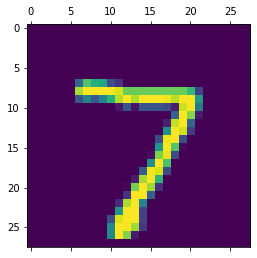

In [35]:
plt.matshow(X_test[0])

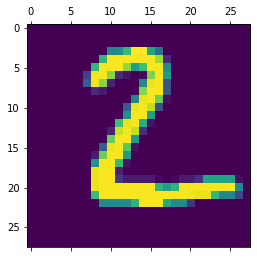

In [36]:
plt.matshow(X_test[1])

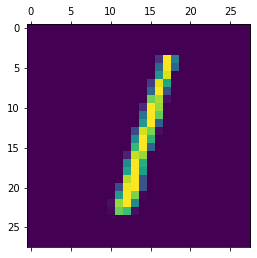

In [37]:
plt.matshow(X_test[2])

In [38]:
#**np.argmax finds a maximum element  from an array and returns the index of it**
np.argmax(y_predict[0])

7

In [39]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [41]:
c = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
c

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    4,    5,    3,    1,    0],
       [   0, 1106,    3,    2,    0,    2,    4,    2,   16,    0],
       [   8,    7,  935,   10,    7,    3,   13,   11,   34,    4],
       [   5,    0,   25,  895,    0,   36,    2,   16,   21,   10],
       [   1,    1,    6,    0,  905,    0,   12,    6,    7,   44],
       [  11,    2,    4,   17,    7,  795,   17,    6,   26,    7],
       [  14,    3,    6,    1,    7,   13,  911,    2,    1,    0],
       [   1,    5,   24,    2,    3,    0,    0,  958,    2,   33],
       [  11,    5,    8,   14,    9,   30,    9,   14,  862,   12],
       [  11,    6,    1,    7,   22,    8,    0,   29,    6,  919]])>

Text(69.0, 0.5, 'Truth')

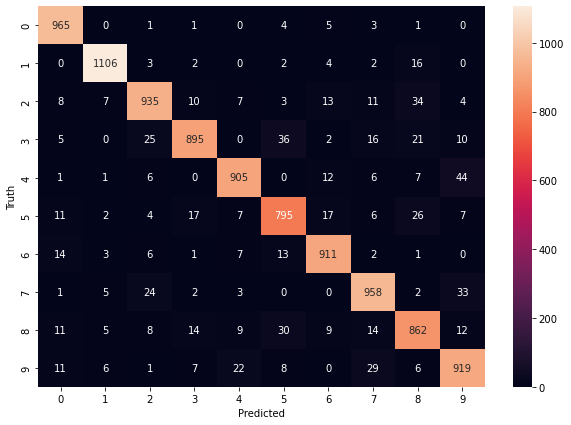

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(c, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
#using hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatt, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1197 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0835 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0643 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9841


In [46]:
model.evaluate(X_test_flatt,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9766


[0.07615277916193008, 0.9765999913215637]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

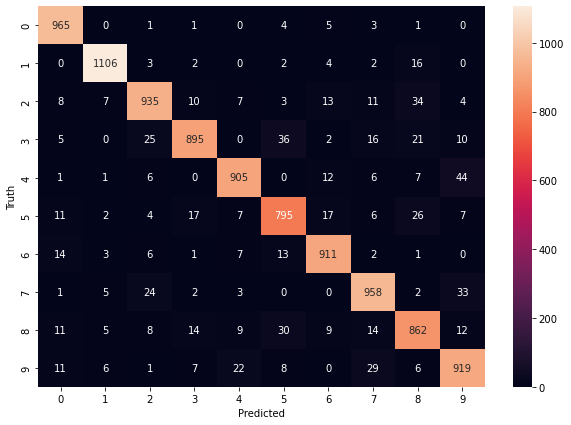

In [47]:
y_predictd = model.predict(X_test_flatt)
y_predictd_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predictd_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
#Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2726 - accuracy: 0.9211
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0305 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.021

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9767


[0.09028509259223938, 0.9767000079154968]